<a href="https://colab.research.google.com/github/sauravdey99/Logicmojo-AI-ML-Sept25-sauravdey/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Housing.csv")

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
num_cols = df.select_dtypes(include='number')

In [ ]:
num_cols.corr()['price']

price       1.00
area        0.54
bedrooms    0.37
bathrooms   0.52
stories     0.42
parking     0.38
Name: price, dtype: float64

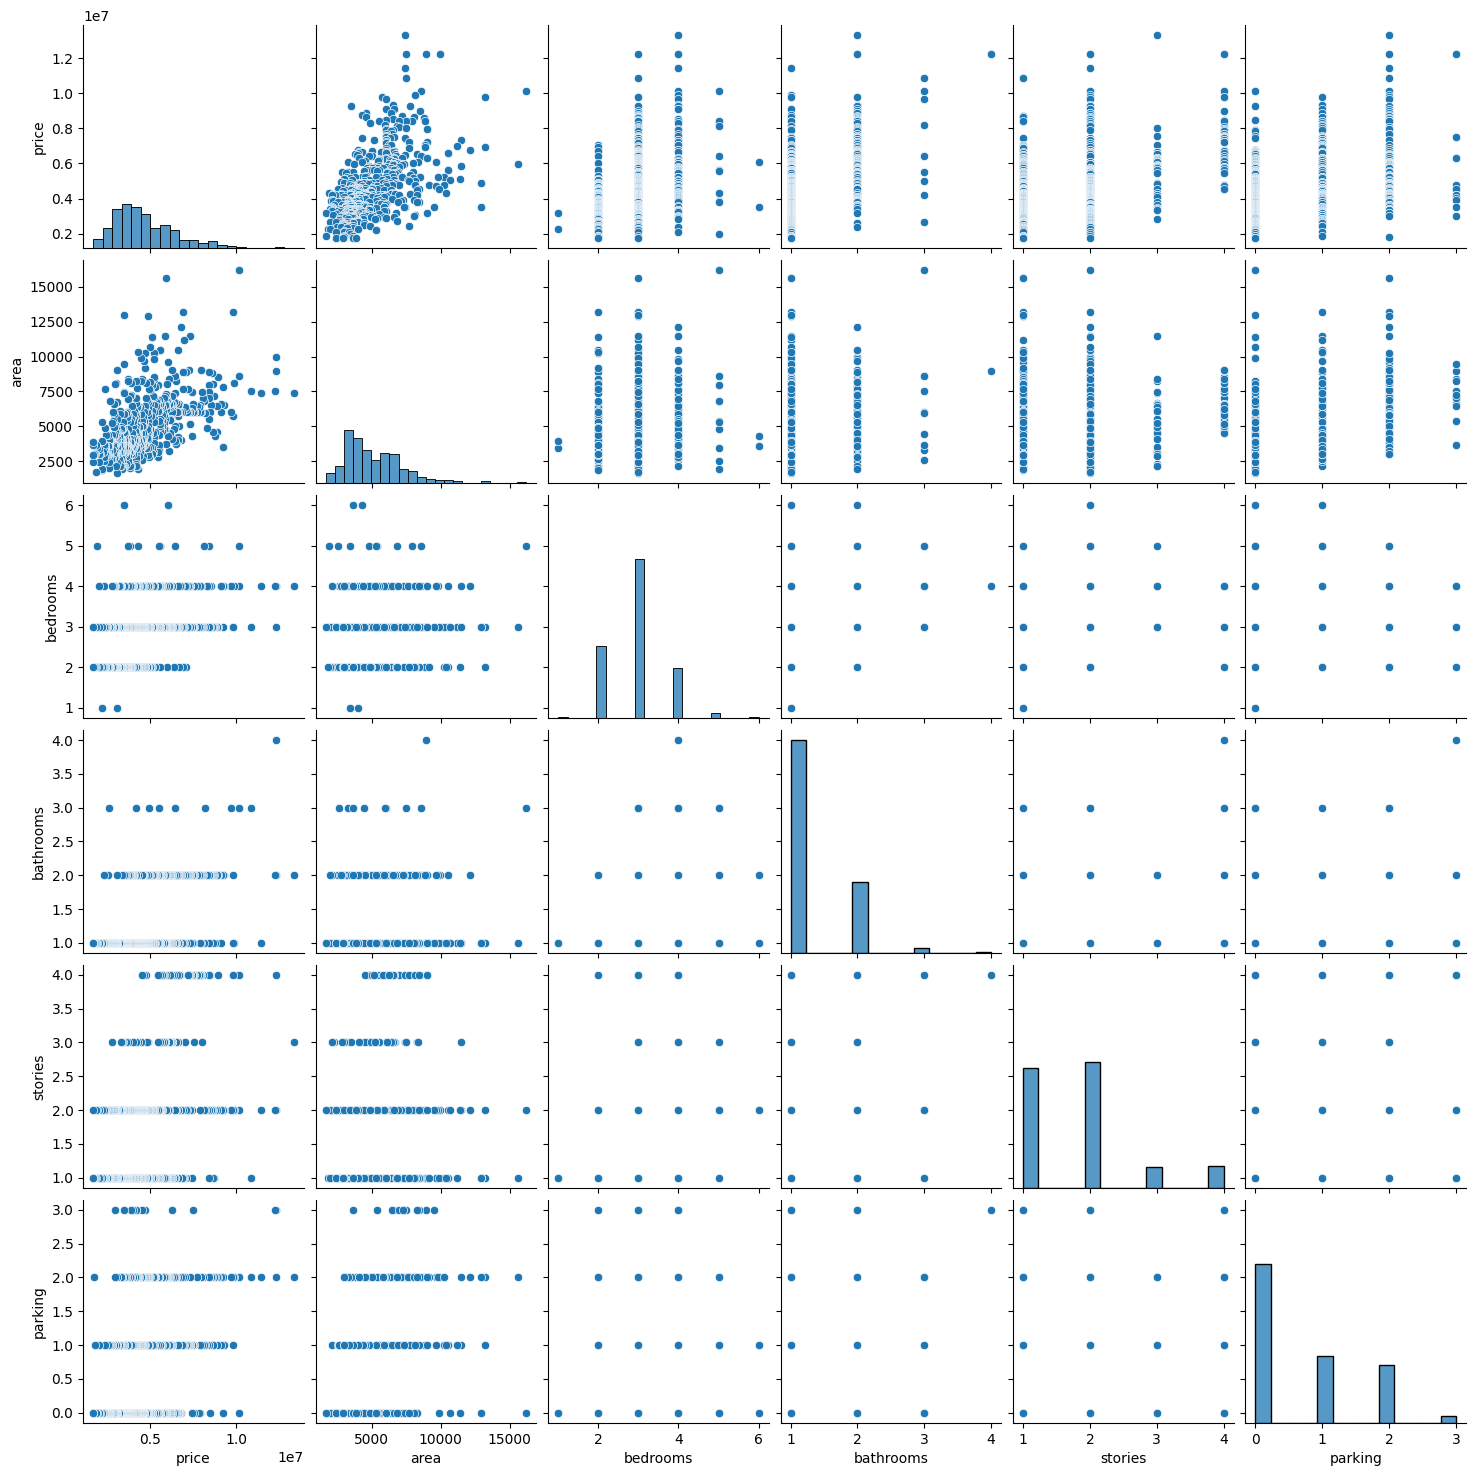

In [ ]:
sns.pairplot(num_cols)

In [ ]:
obj_cols

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_cols.drop('price', axis=1),
                                                    num_cols['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((381, 5), (164, 5))

In [ ]:
X_train

,area,bedrooms,bathrooms,stories,parking
454,4500,3,1,2,0
392,3990,3,1,2,0
231,4320,3,1,1,0
271,1905,5,1,2,0
250,3510,3,1,3,0
...,...,...,...,...,...
70,4000,3,2,2,0
277,10360,2,1,1,1
9,5750,3,2,4,1
359,3600,3,1,1,1


# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sk = StandardScaler()
X_train_trans = sk.fit_transform(X_train)
X_test_trans = sk.transform(X_test)

In [ ]:
X_train_trans

array([[-0.28636589,  0.07376409, -0.58122996,  0.20740088, -0.82296013],
       [-0.54476182,  0.07376409, -0.58122996,  0.20740088, -0.82296013],
       [-0.37756445,  0.07376409, -0.58122996, -0.93781267, -0.82296013],
       ...,
       [ 0.34695748,  0.07376409,  1.48838327,  2.49782797,  0.32137494],
       [-0.74235871,  0.07376409, -0.58122996, -0.93781267,  0.32137494],
       [ 0.77761736,  0.07376409, -0.58122996, -0.93781267, -0.82296013]],
      shape=(381, 5))

In [ ]:
X_train_trans = pd.DataFrame(
    X_train_trans,
    columns=X_train.columns,
    index=X_train.index
)

X_test_trans = pd.DataFrame(
    X_test_trans,
    columns=X_test.columns,
    index=X_test.index
)

# One hot encoding

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(obj_cols,
                                                    df['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((381, 7), (164, 7))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',dtype=np.int32)
X_train_catag = ohe.fit_transform(X_train)
X_test_catag = ohe.transform(X_test)

In [ ]:
type(X_test_catag)

scipy.sparse._csr.csr_matrix

In [ ]:
X_train_catag = pd.DataFrame(
    X_train_catag.toarray(),  # convert sparse to dense if needed
    columns=ohe.get_feature_names_out(X_train.columns),
    index=X_train.index
)

X_test_catag = pd.DataFrame(
    X_test_catag.toarray(),
    columns=ohe.get_feature_names_out(X_test.columns),
    index=X_test.index
)


In [ ]:
X_train_catag

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
454,1,0,0,0,1,0,0,1
392,1,0,0,0,0,0,1,0
231,1,0,0,0,0,1,1,0
271,0,0,1,0,0,0,1,0
250,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
70,1,0,1,0,1,1,1,0
277,1,0,0,0,0,1,1,0
9,1,1,0,0,1,1,0,1
359,1,0,0,0,0,0,0,1


In [ ]:
X_train_new = pd.concat([X_train_trans, X_train_catag,y_train], axis=1)
X_test_new  = pd.concat([X_test_trans, X_test_catag,y_test], axis=1)

In [ ]:
df_final = pd.concat([X_train_new,X_test_new],axis = 0)

<Axes: xlabel='area', ylabel='price'>

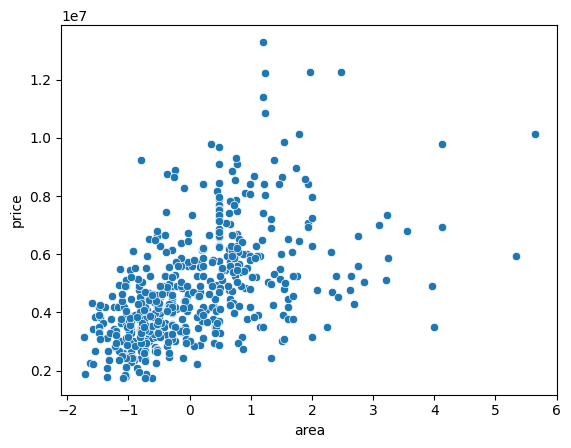

In [ ]:
sns.scatterplot(x = df_final['area'],y = df_final['price'])

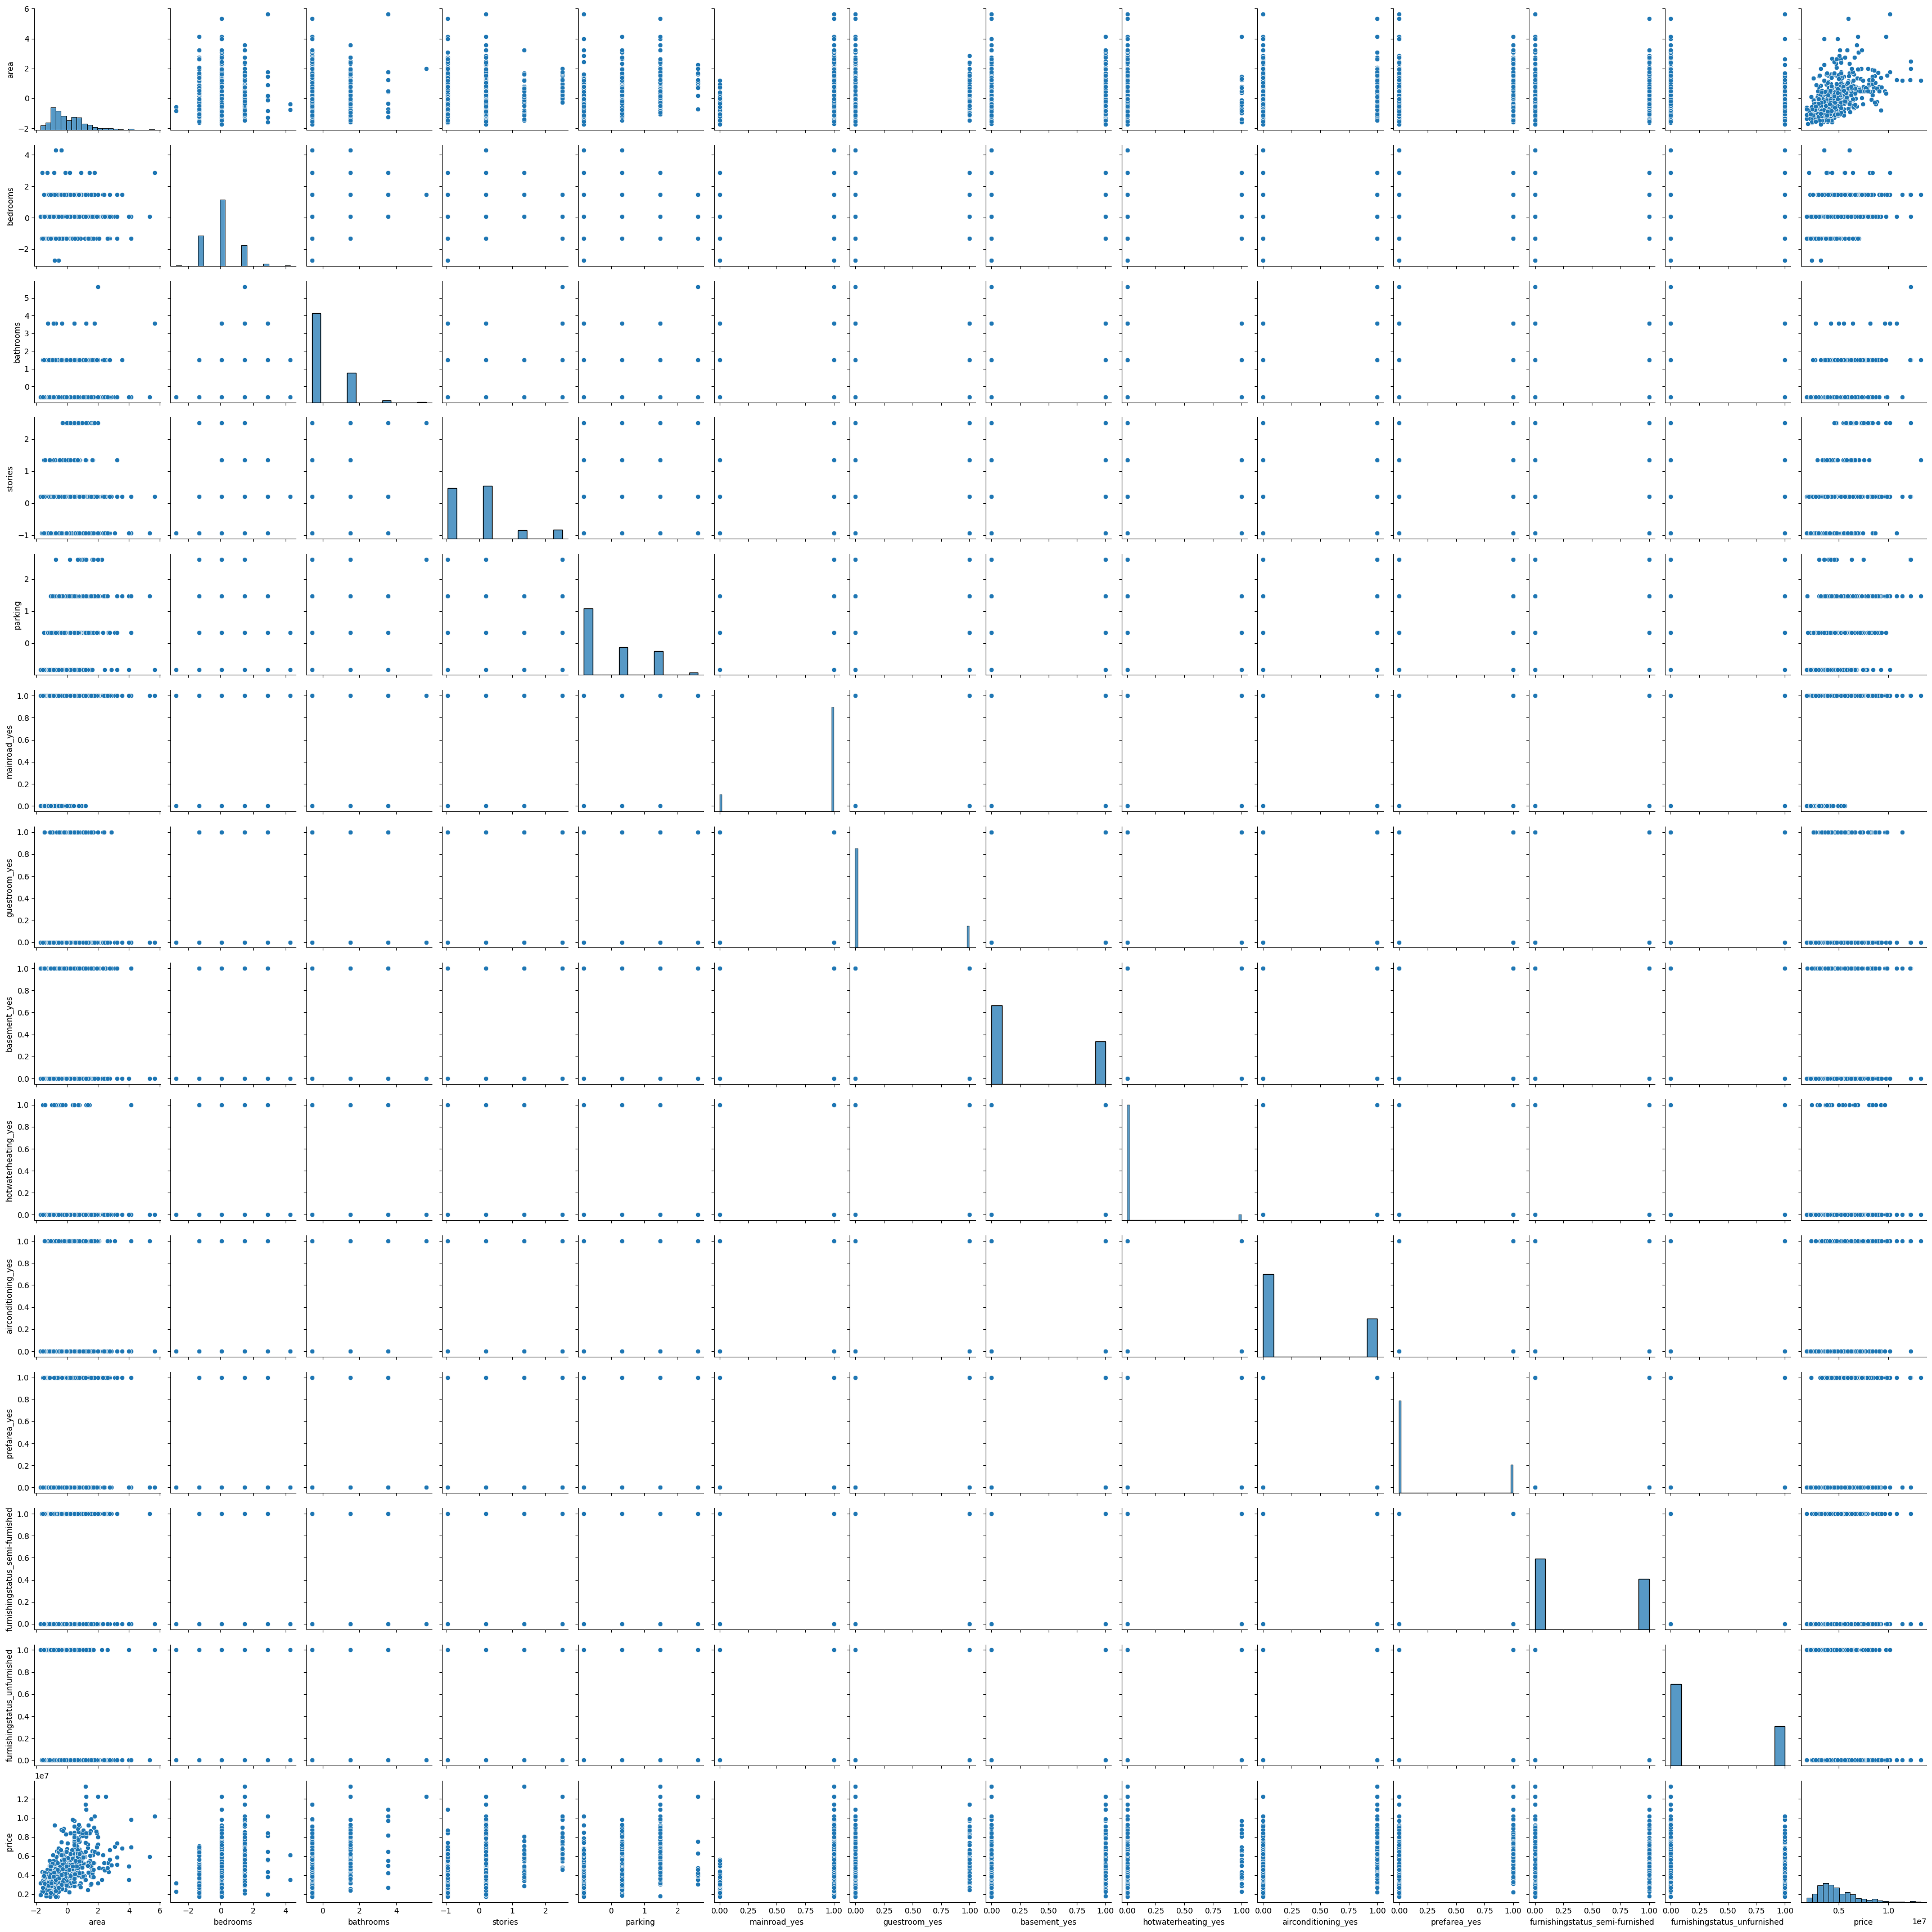

In [ ]:
sns.pairplot(df_final)

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final.iloc[:,0:-1],
                                                    df_final.iloc[:,-1:],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape,y_test.shape

((381, 13), (164, 13), (164, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
lr.coef_

array([[ 545578.16654901,   58981.76857477,  465063.05077708,
         415885.66348102,  271540.81175353,  335784.9797484 ,
         312773.85111996,  357054.62829652,  871583.62311211,
         943544.51366755,  586573.06067087,  -66713.98281521,
        -411166.33075546]])

In [ ]:
lr.intercept_

array([4009713.9317366])

In [ ]:
df.iloc[447]

price                      3150000
area                          3500
bedrooms                         2
bathrooms                        1
stories                          1
mainroad                        no
guestroom                       no
basement                       yes
hotwaterheating                 no
airconditioning                 no
parking                          0
prefarea                        no
furnishingstatus    semi-furnished
Name: 447, dtype: object

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MAE =",mean_absolute_error(y_test, y_pred))
print("MSE =",mean_squared_error(y_test, y_pred))
print("r2 =",r2_score(y_test, y_pred))



MAE = 782148.2067660285
MSE = 1135028998906.1643
r2 = 0.6298253623430298


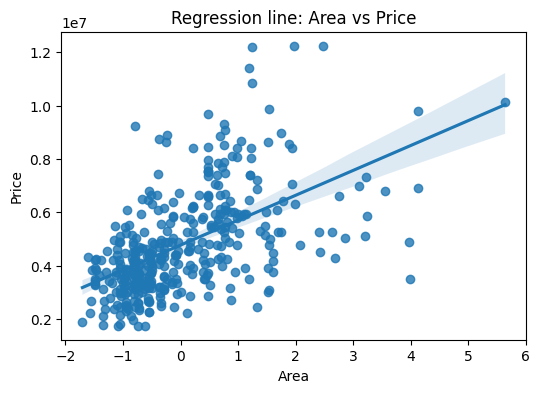

In [ ]:
plt.figure(figsize=(6,4))
sns.regplot(x=X_train['area'], y=y_train)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Regression line: Area vs Price")
plt.show()

In [ ]:
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_pred.shape

(164, 1)

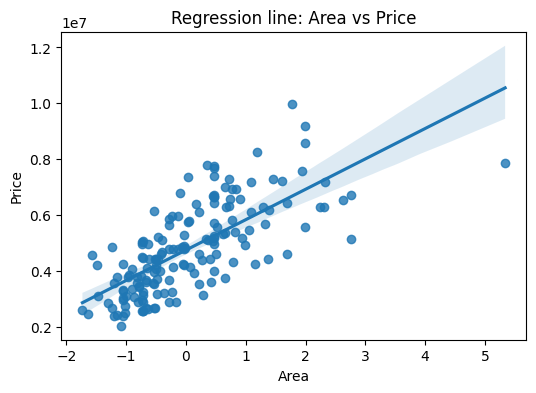

In [ ]:
plt.figure(figsize=(6,4))
sns.regplot(x=X_test['area'], y=y_pred)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Regression line: Area vs Price")
plt.show()

In [ ]:
y_pred = np.array(y_pred)
y_test = np.array(y_test['price'])

/var/folders/5l/q46c7s6j41l1b09g5fb89wlhpfwhsh/T/ipykernel_71357/1847588913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), bins = 20)


<Axes: ylabel='Density'>

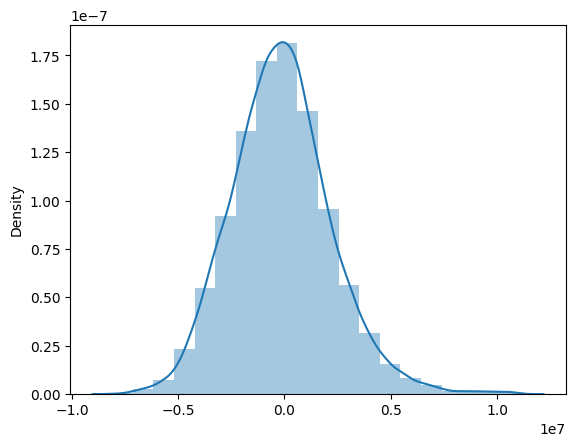

In [ ]:
sns.distplot((y_test - y_pred), bins = 20)

# Using OLS

In [ ]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model = sm.OLS(y_train,X_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     64.58
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           2.12e-86
Time:                        11:49:37   Log-Likelihood:                -5825.3
No. Observations:                 381   AIC:                         1.168e+04
Df Residuals:                     367   BIC:                         1.173e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
y_predOls = model.predict(X_test_const)

In [ ]:
type(y_predOls)

pandas.core.series.Series

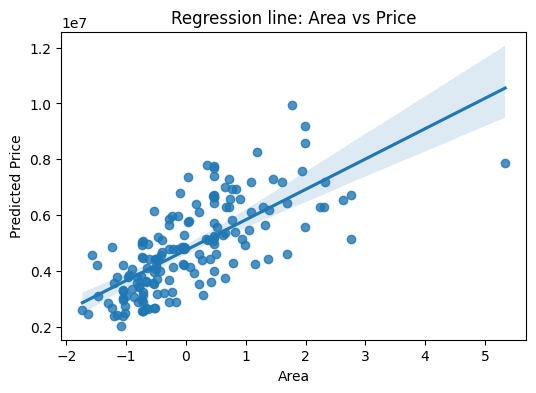

In [ ]:
plt.figure(figsize=(6,4))
sns.regplot(x=X_test['area'], y=y_pred)
plt.xlabel("Area")
plt.ylabel("Predicted Price")
plt.title("Regression line: Area vs Price")
plt.show()

In [ ]:
y_pred = np.array(y_predOls)
y_test = np.array(y_test)

/var/folders/5l/q46c7s6j41l1b09g5fb89wlhpfwhsh/T/ipykernel_71357/1847588913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), bins = 20)


<Axes: ylabel='Density'>

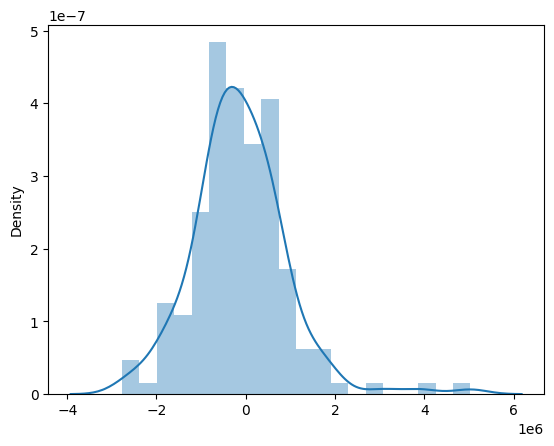

In [ ]:
sns.distplot((y_test - y_pred), bins = 20)